### Student Information
Name: 林安情

Student ID: 114062631

GitHub ID: zeroannnn

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [80]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to /Users/zeroan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Data Preparation

In [81]:
data_path = "./newdataset/Reddit-stock-sentiment.csv"
reddit_stock = pd.read_csv(data_path)

# Let's take a look at some of the titles that are contained in our subset of the data
print(reddit_stock.title[0:2].tolist())

['Retardation is on the menu boys! WSB is so back', 'Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history']


In [82]:
len(reddit_stock)

847

In [83]:
# 我發現在 Reddit-stock-sentiment.csv 中，subreddit 的欄位有四個不同的類別：'wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'
print(reddit_stock["subreddit"].unique())

['wallstreetbets' 'StockMarket' 'stockstobuytoday' 'stocks']


In [84]:
# 觀看 Reddit-stock-sentiment.csv 中，每一筆資料皆有的記錄資訊
rows = reddit_stock.iloc[0:2]

for index, row in rows.iterrows():
    print(f"data{index}:")
    for col, val in row.items():
        print(f"{col}: {val},")
    print("-----------------------") 

data0:
type: comment,
datetime: 2025-04-11 17:29:56,
post_id: mmli62w,
subreddit: wallstreetbets,
title: Retardation is on the menu boys! WSB is so back,
author: StickyTip420,
url: https://i.redd.it/0yq2ftren8ue1.jpeg,
upvotes: 0,
downvotes: nan,
upvote_ratio: nan,
text: Calls on retards,
subjectivity: 1.0,
polarity: -0.9,
sentiment: -1.0,
entities: [],
label: -1.0,
-----------------------
data1:
type: comment,
datetime: 2025-04-12 1:12:19,
post_id: mmnu7v9,
subreddit: wallstreetbets,
title: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history,
author: Comfortable-Dog-8437,
url: https://i.redd.it/7tl6puv9waue1.jpeg,
upvotes: -15,
downvotes: nan,
upvote_ratio: nan,
text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.,
subjectivity: 0.1777777777777777,
polarity: 0.0833333333333333,
sentiment: 1.0,
entities: ['Stunt', 'company', 'deal', 'place'],
label:

## 3. Data Transformation
### Adding Columns

In [85]:
# 將 sentiment 的數值依據 ” 1.0 is positive, 0.0 is neutral and -1.0 is negative“ 轉換，新增一個 column 紀錄之
sentiment_map = { -1.0: "negative", 0.0: "neutral", 1.0: "positive" }

def format_sentiment_label(val):
    return sentiment_map.get(val, "unknown")

reddit_stock["sentiment_name"] = reddit_stock.sentiment.apply(format_sentiment_label)

print(reddit_stock[["sentiment", "sentiment_name"]][:20])
print("------------------------------------------------------------------------------")
print(reddit_stock.sentiment_name.value_counts())


    sentiment sentiment_name
0        -1.0       negative
1         1.0       positive
2         0.0        neutral
3         1.0       positive
4         0.0        neutral
5         1.0       positive
6        -1.0       negative
7         1.0       positive
8         1.0       positive
9         0.0        neutral
10        0.0        neutral
11        1.0       positive
12        1.0       positive
13        1.0       positive
14        0.0        neutral
15       -1.0       negative
16        0.0        neutral
17        1.0       positive
18        0.0        neutral
19        1.0       positive
------------------------------------------------------------------------------
sentiment_name
neutral     331
positive    319
negative    197
Name: count, dtype: int64


### Familiarizing with the Data

In [86]:
reddit_stock[:10][["title","author"]]

,title,author
0,Retardation is on the menu boys! WSB is so back,StickyTip420
1,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437
2,How do you feel about a sitting president maki...,Btankersly66
3,Who knows more? $VMAR,emiljenfn
4,The Trump administration is begging Xi Jinping...,Just-Big6411
5,Weekend Discussion Thread for the Weekend of A...,PolarNimbus
6,Is the market in complete denial right now?,stoniey84
7,Retardation is on the menu boys! WSB is so back,OSRSkarma
8,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox
9,Any cheap stocks under $10?,Zumuru


In [87]:
reddit_stock[-10:]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,sentiment_name
837,comment,2021-02-01 17:13:52,glmdsae,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",jackandjill22,https://www.reddit.com/r/stocks/comments/la34b...,4,NaN,NaN,Finance media lying \n\n*Surprise*,0.0,0.0,0.0,"['Finance', 'Surprise', '*']",-1.0,neutral
838,comment,2021-04-26 20:17:28,gvyyjqb,stockstobuytoday,"Stocks with high Short Float. $AAL, $CLVS, $SD...",Chief-Default,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,I am all in,0.0,0.0,0.0,[],0.0,neutral
839,comment,2025-04-11 16:02:56,mml0hpk,StockMarket,The Trump administration is begging Xi Jinping...,Mr_Dorfmeister,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,The Art of the Deal…,0.0,0.0,0.0,"['Art', 'Deal…']",0.0,neutral
840,comment,2025-04-11 9:32:08,mmjac41,StockMarket,🚨China responds to Trump’s 145% tariff with an...,ijuscrushalot,https://i.redd.it/2f7y4h6226ue1.jpeg,2,NaN,NaN,Lol fr,0.7,0.8,1.0,"['Lol', 'fr']",0.0,positive
841,comment,2025-04-11 16:09:15,mml1qqd,StockMarket,The Trump administration is begging Xi Jinping...,le_mihai,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,So countries “begging to stop the tariffs” and...,0.0,0.0,0.0,"['”', '“', 'anything', 'deal']",1.0,neutral
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.0,0.0,0.0,['tomorrow'],1.0,neutral
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.0,0.0,0.0,[],0.0,neutral
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0,neutral
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.0,0.0,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0,neutral
846,comment,2025-04-12 3:09:06,mmobyz1,wallstreetbets,Someone post the hotline please.,I_am_Nerman,https://i.redd.it/tcfuu97p7bue1.jpeg,1,NaN,NaN,![img](emote|t5_2th52|31224),0.0,0.0,0.0,"['img', ']', '[', 'emote|t5_2th52|31224']",0.0,neutral


In [88]:
print(len(reddit_stock["author"].unique()))
print(reddit_stock["author"].unique())

731
['StickyTip420' 'Comfortable-Dog-8437' 'Btankersly66' 'emiljenfn'
 'Just-Big6411' 'PolarNimbus' 'stoniey84' 'OSRSkarma' 'Blondbox' 'Zumuru'
 'MitchCurry' 'RememberTooSmile' 'JBallMan23' 'Miramarmechanic'
 'Odd-Temperature-791' 'nerokaeclone' 'hotgarbagevideo'
 'BrotherlyShove791' 'freewilly7315' 'Vanman04' 'Golden__Eagle'
 'Either_Breadfruit_90' 'tiredsultan' 'No_Mercy_4_Potatoes'
 'applecokecake' 'Rosebunse' 'MTPWAZ' 'Silly_Accountant_687'
 'PlannedObsolescence-' 'Ok_Talk_7837' 'Kemilio' '[deleted]'
 'Kaffe-Mumriken' 'cupcake0calypse' 'SmithRune735' 'Interesting-Loss34'
 'kl7aw220' 'BippityBoppitty69' 'Skeleton-ear-face' 'Lost-Panda-68'
 'InstructionNo4546' 'Limp-Project5733' 'Too_theXtreme' 'rockytrh'
 'HarleyDog67' 'eulynn34' 'Elegant-Berry5192' 'saasfin' 'CEOofBeanz'
 'MayorOfDanktown' 'm1lkm1lk' 'likeitis121' 'cmm239' 'Queasy-Length4314'
 'J3ster14' 'blowgrass-smokeass' 'questron64' 'spoony20'
 'Certain-Statement-95' 'FumblersUnited' 'AutoModerator' 'SpakenBacon'
 'OmegaKitty1

In [89]:
print(reddit_stock["type"].unique())

['comment' 'post']


In [90]:
print(reddit_stock["subreddit"].unique())

['wallstreetbets' 'StockMarket' 'stockstobuytoday' 'stocks']


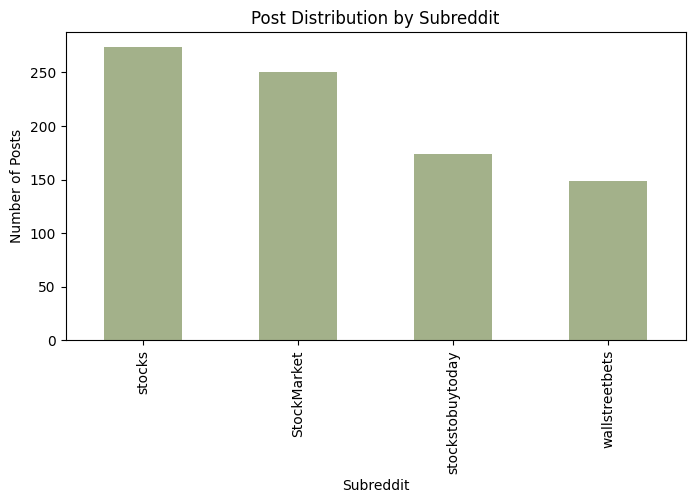

In [91]:
plt.figure(figsize=(8,4))
reddit_stock['subreddit'].value_counts().plot(kind='bar', color='#A3B18A')
plt.title("Post Distribution by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Number of Posts")
plt.show()

In [92]:
# 找出出現 >=2 次的作者
author_counts = reddit_stock["author"].value_counts()
authors_multi = author_counts[author_counts >= 2].index

result = reddit_stock[reddit_stock["author"].isin(authors_multi)][['author', 'title', 'sentiment_name']]
print(result)

               author                                              title  \
11   RememberTooSmile  Weekend Discussion Thread for the Weekend of A...   
31          [deleted]                     Best EV / green mining stocks?   
34       SmithRune735  It's fucking awful seeing the "Silver" misinfo...   
42       SmithRune735  It's fucking awful seeing the "Silver" misinfo...   
48            saasfin                          Earnings for current week   
..                ...                                                ...   
817         [deleted]  It's fucking awful seeing the "Silver" misinfo...   
819              Zx40  BREAKING: China raises tariffs on U.S. goods t...   
830      gamjatang111  r/Stocks Daily Discussion & Fundamentals Frida...   
836           saasfin                                     Futures Market   
844           saasfin                            Analyst Recommendations   

    sentiment_name  
11        positive  
31        positive  
34        negative  
42 

In [93]:
#  列印那些出現 >= 2 次的作者，publish 那些 title，並根據出現的次數由大到小列印
result = (
    reddit_stock[reddit_stock["author"].isin(authors_multi)]
    .groupby("author")
    .agg(
        count=("author", "size"),                      # 出現次數
        titles=("title", lambda x: list(x))            # 該作者所有文章標題
    )
    .sort_values(by="count", ascending=False) 
    .reset_index()
)

print(result)

                  author  count  \
0                saasfin     57   
1          AutoModerator     15   
2              [deleted]     13   
3               bullrfuk      5   
4                 wutang      3   
5              CarRamRob      3   
6               FarrisAT      3   
7          MutaliskGluon      3   
8           gamjatang111      2   
9             bro-v-wade      2   
10          elgrandorado      2   
11               giggy13      2   
12     gary_oldman_sachs      2   
13          homework8976      2   
14               jrex035      2   
15         sarhoshamiral      2   
16              badasimo      2   
17        AnonymusFarmer      2   
18                  Zx40      2   
19   Straight_Turnip7056      2   
20          SmithRune735      2   
21          SilentBeetle      2   
22      RememberTooSmile      2   
23      Ok-Scallion-9423      2   
24         Maleficent298      2   
25             KaitRaven      2   
26    GoogleKushforLunch      2   
27  Financial-Device

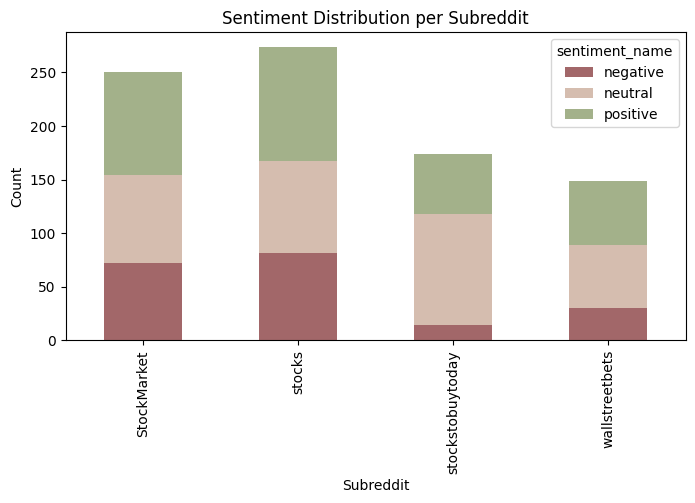

In [94]:
# 每一個 subreddit 分類中，negative、neutral、positive 的數量
sentiment_by_sub = reddit_stock.groupby(['subreddit', 'sentiment_name']).size().unstack(fill_value=0)

sentiment_by_sub.plot(kind='bar', stacked=True, color=['#A26769', '#D5BDAF', '#A3B18A'], figsize=(8,4))
plt.title("Sentiment Distribution per Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Count")
plt.show()

## 4. Data Mining using Pandas
### 4.1 Missing Values

In [95]:
reddit_stock.isnull()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,sentiment_name
0,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [96]:
import helpers.data_mining_helpers as dmh

reddit_stock.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0,0


In [97]:
reddit_stock.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [98]:
# 查看 'downvotes', 'upvote_ratio' 的 misssing value 比例
reddit_stock[['downvotes', 'upvote_ratio']].isna().mean()

downvotes       0.924439
upvote_ratio    0.924439
dtype: float64

In [99]:
dummy_series = pd.Series(["wallstreetbets", "Retardation is on the menu boys! WSB is so bac", "kStickyTip420", "https://i.redd.it/0yq2ftren8ue1.jpeg", "0", "Calls on retards", 1.0, -0.9, -1.0, [], -1.0]
                        , index=["subreddit", "title", "author", "url", "upvotes", "text", "subjectivity", "polarity",	"sentiment", "entities", "label"])
# "comment", "2025-04-11 17:29:56", "mmli62w", "wallstreetbets", "Retardation is on the menu boys! WSB is so bac", "kStickyTip420", "https://i.redd.it/0yq2ftren8ue1.jpeg", "0", "Calls on retards", 1.0, -0.9, -1.0, [], -1.0

In [100]:
dummy_series.to_frame().T

,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,wallstreetbets,Retardation is on the menu boys! WSB is so bac,kStickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.0,-0.9,-1.0,[],-1.0


In [101]:
result_with_series = pd.concat([reddit_stock, dummy_series.to_frame().T], ignore_index=True)

In [102]:
len(result_with_series)

848

In [103]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,1,0,0,0,0,0,784,784,0,0,0,0,0,0,1


### 4.2 Dealing with Duplicate Data

In [104]:
reddit_stock.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [105]:
sum(reddit_stock.duplicated())

0

In [106]:
# 單純想實驗看看而已，我知道這個資訊對我們來說無意義
# ‘sentiment’目前只有三個值的可能，看 .duplicated('sentiment') 會如何反應

sum(reddit_stock.duplicated('sentiment'))

844

In [107]:
# 新增兩筆相同的資料
dummy_duplicate_dict = [{
                              "subreddit": "Hehe",
                              "title": "Heheheheheheheh", 
                              "author": "zeroan",
                              "url":  "https://zz",
                              "upvotes": "0",
                              "text": "Calls me again",
                              "subjectivity": 1.0,
                              "polarity": 0.9,
                              "sentiment": 1,
                              "label": -1.0
                         },
                         {
                              "subreddit": "Hehe",
                              "title": "Heheheheheheheh", 
                              "author": "zeroan",
                              "url":  "https://zz",
                              "upvotes": "0",
                              "text": "Calls me again",
                              "subjectivity": 1.0,
                              "polarity": 0.9,
                              "sentiment": 1,
                              "label": -1.0
                         }]

In [108]:
test_reddit_stock = pd.concat([reddit_stock, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [109]:
len(test_reddit_stock)

849

In [110]:
sum(test_reddit_stock.duplicated())

1

In [111]:
# 刪除剛剛新增用來測試的 duplicate data
test_reddit_stock.drop_duplicates(keep=False, inplace=True)

In [112]:
# 驗證是否成功刪除
len(test_reddit_stock)

847

## 5.  Data Preprocessing
### 5.1 Sampling

In [113]:
reddit_stock_sample = reddit_stock.sample(n=400) # random state

In [114]:
reddit_stock_sample[0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,sentiment_name
591,comment,2025-04-11 12:25:24,mmjvdbj,stocks,Is the market in complete denial right now?,ShogunMyrnn,https://www.reddit.com/r/stocks/comments/1jwo1...,3,NaN,NaN,"US companies will get damaged this year, I wou...",0.56746,0.292857,1.0,"['year', 'q1', 'downturn', 'US', 'Too', 'tesla...",-1.0,positive
178,comment,2025-04-09 13:41:17,mm7kq9b,stockstobuytoday,If you had $10k in cash…,Electric_seal2,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Buy a cool car bro,0.65000,0.350000,1.0,"['bro', 'car']",0.0,positive
779,comment,2025-04-11 5:24:07,mmim4ho,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,THIS_IS_SO_HILARIOUS,https://i.redd.it/31r650bss4ue1.jpeg,1,NaN,NaN,"Please, dump all of them.",0.00000,0.000000,0.0,['Please'],-1.0,neutral
197,comment,2025-04-11 4:25:29,mmif8lk,StockMarket,$ U.S. dollar value (crashing),jpm0719,https://i.redd.it/atvlo83gk4ue1.jpeg,7,NaN,NaN,Agolf Shittler or tangerine toddler.,0.00000,0.000000,0.0,"['Shittler', 'Agolf', 'toddler']",-1.0,neutral
398,comment,2025-04-11 21:41:29,mmmvba2,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,TargetDreams,https://www.reddit.com/r/wallstreetbets/commen...,45,NaN,NaN,How this Friday pumped is beyond me.,0.00000,0.000000,0.0,['Friday'],0.0,neutral


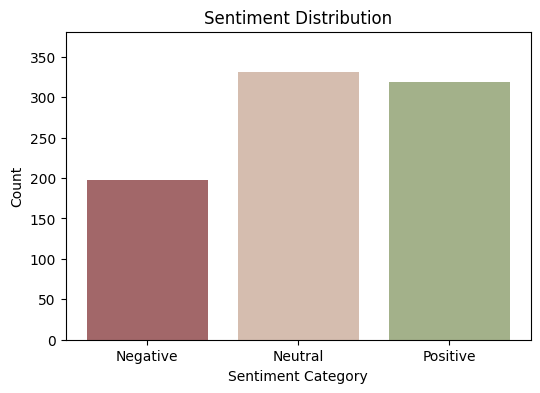

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

# vusualize the sentiment categories quantities
neg_count = len(reddit_stock[reddit_stock['sentiment_name'] == 'negative'])
neu_count = len(reddit_stock[reddit_stock['sentiment_name'] == 'neutral'])
pos_count = len(reddit_stock[reddit_stock['sentiment_name'] == 'positive'])

categories = ['Negative', 'Neutral', 'Positive']
counts = [neg_count, neu_count, pos_count]

plt.figure(figsize=(6,4))
plt.bar(categories, counts, color=['#A26769', '#D5BDAF', '#A3B18A'] )
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.ylim(0, max(counts) + 50)
plt.show()

<Axes: title={'center': 'Category distribution'}>

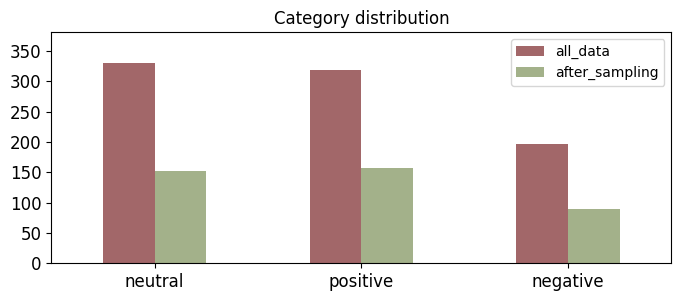

In [116]:
s1 = reddit_stock.sentiment_name.value_counts()
s2 = reddit_stock_sample.sentiment_name.value_counts()

df = pd.concat([s1.rename("all_data"), s2.rename("after_sampling")], axis=1)
df.index.name = None
df.plot(kind='bar',
        title='Category distribution',
        ylim=[0, max(s1.max(), s2.max())+50], 
        rot=0, fontsize=12, figsize=(8,3),
        color=['#A26769', '#A3B18A'])

### 5.2 Feature Creation

In [117]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/zeroan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zeroan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [118]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

reddit_stock['unigrams'] = reddit_stock['text'].apply(lambda x: dmh.tokenize_text(x))

In [119]:
reddit_stock[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [120]:
list(reddit_stock[1:2]['unigrams'])

[['Stunt',
  'as',
  'in',
  'like',
  'why',
  'did',
  'they',
  'even',
  'make',
  'a',
  'big',
  'deal',
  'about',
  'starting',
  'it',
  'in',
  'the',
  'first',
  'place',
  '?',
  'No',
  'company',
  'should',
  'ever',
  'talk',
  'about',
  'politics',
  'ever',
  '.']]

### 5.3 Feature subset selection

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
reddit_stock_counts = count_vect.fit_transform(reddit_stock.text) #learn the vocabulary and return document-term matrix
print(reddit_stock_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [122]:
reddit_stock_counts.shape

(847, 4346)

In [123]:
reddit_stock_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [124]:
row = reddit_stock_counts[1].toarray()
indices = row.nonzero()[1]
word = [count_vect.get_feature_names_out()[i] for i in indices]
print(word)

['about', 'as', 'big', 'company', 'deal', 'did', 'even', 'ever', 'first', 'in', 'it', 'like', 'make', 'no', 'place', 'politics', 'should', 'starting', 'stunt', 'talk', 'the', 'they', 'why']


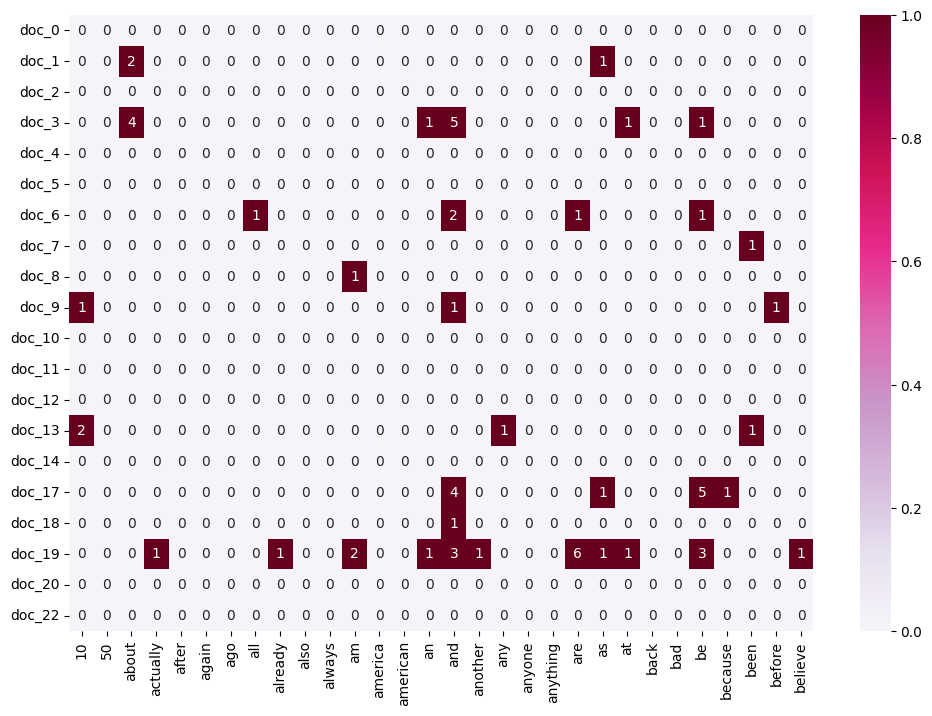

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 計算每一個 term 在文件數出現次數，並選出次數 > 10 的 term
df = np.asarray((reddit_stock_counts > 0).sum(axis=0)).ravel()
cols_keep = np.where(df > 10)[0]                   

# 取出這些欄，接著保留那些欄位值非 0 的文章
X_sub = reddit_stock_counts[:, cols_keep]
row_nnz = np.asarray((X_sub > 0).sum(axis=1)).ravel()
rows_keep = np.where(row_nnz > 0)[0]

rows_keep = rows_keep[:20]
cols_keep = cols_keep[:30]

dense = reddit_stock_counts[rows_keep][:, cols_keep].toarray()

vocab = count_vect.get_feature_names_out()
df_plot = pd.DataFrame(dense,
                       index=[f"doc_{i}" for i in rows_keep],
                       columns=vocab[cols_keep])

plt.figure(figsize=(min(14, 0.2*len(cols_keep)+6), min(10, 0.2*len(rows_keep)+4)))
sns.heatmap(df_plot,
            cmap="PuRd",
            vmin=0, vmax=1, annot=True)
plt.show()

### 5.4 Attribute Transformation / Aggregation
###  5.4.1 Transform Text Data

In [126]:
term_frequencies = np.asarray(reddit_stock_counts.sum(axis=0))[0]
term_frequencies[0]

np.int64(4)

In [127]:
import numpy as np
import plotly.express as px

sorted_idx = np.argsort(term_frequencies)[::-1]   # 由大到小排序
sorted_words = vocab[sorted_idx]
sorted_freqs = term_frequencies[sorted_idx]

fig = px.bar(
    x=sorted_words[:300],    
    y=sorted_freqs[:300],
    labels={'x': 'Terms', 'y': 'Frequency'}
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()

In [128]:
import plotly.express as px
import numpy as np

# 找出詞頻最高的前 30 個詞
vocab = count_vect.get_feature_names_out()
term_frequencies_log = [math.log(i) for i in term_frequencies]
freqs = np.asarray(term_frequencies_log, dtype=float)

# .argsort() 會把 freqs 由小到大排序
top_idx = np.argsort(freqs)[-300:][::-1]
top_words = vocab[top_idx]
top_freqs = freqs[top_idx]

fig = px.bar(
    x=top_words, 
    y=top_freqs,
    labels={'x': 'Terms', 'y': 'Frequency'},
    title='Top 300 Most Frequent Terms by using log() to evaluate',
)

fig.update_layout(xaxis_tickangle=-90) 
fig.update_layout(title={'x':0.5})
fig.show()

# Phase 2

In [129]:
### Begin Assignment Here